In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())


2025-04-10 22:42:51.829297: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 22:42:51.836626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744342971.845288   12382 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744342971.847762   12382 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744342971.854283   12382 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version: 2.19.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2025-04-10 22:42:52.899337: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-10 22:42:52.899352: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-04-10 22:42:52.899355: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-04-10 22:42:52.899357: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-04-10 22:42:52.899359: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: MightyMeca
2025-04-10 22:42:52.899360: I external/local_xla/xla/stream_executor/cuda/cu

In [2]:
import os
import random as rn
from os import mkdir
from os.path import exists
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau
import sys
sys.path.insert(0, "../")

In [3]:
seed = 0
os.environ["PYTHONHASHSEED"] = "0"

np.random.seed(seed)
rn.seed(seed)
tf.random.set_seed(seed)

from deeparuco.impl.architectures import custom_decoder
from deeparuco.impl.datagen import custom_decoder_gen


# Control paramters
batch_size = 32
epochs = 100
patience = 20
reduce_after = 10

# Model
model = custom_decoder()
model.summary
model.compile(loss="mae", optimizer="adam")


# Load dataset
train_src_dir = '../dataset/inpaint/crops_orig/train'
valid_src_dir = '../dataset/inpaint/crops_orig/val'
train_csv     = '../dataset/inpaint/crops_orig/train128.csv'
valid_csv     = '../dataset/inpaint/crops_orig/val128.csv'
train_df = pd.read_csv(train_csv)
valid_df = pd.read_csv(valid_csv)

train_generator = custom_decoder_gen(train_df, train_src_dir, batch_size, False, True)
valid_generator = custom_decoder_gen(valid_df, valid_src_dir, batch_size, False, True)

# Callbacks

stop = EarlyStopping(
    monitor="val_loss",
    patience=patience,
    verbose=True,
    restore_best_weights=True,
    min_delta=1e-4,
)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", patience=reduce_after, factor=0.5)

Loading data...


100%|██████████| 119985/119985 [00:24<00:00, 4869.00it/s]


Loading data...


100%|██████████| 9000/9000 [00:01<00:00, 4824.48it/s]


7
video-AP7PvpujjZZGLnsJt-frame-001800-JC8xi8NGp9RiiDib8_7.jpg
2
[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 1. 0.]


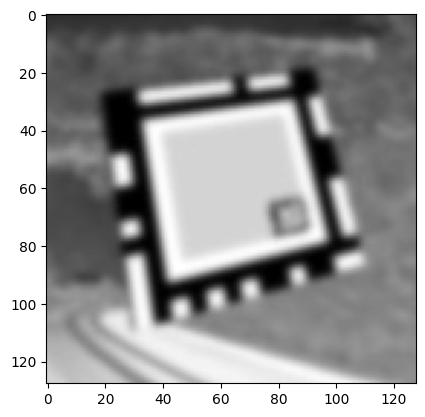

In [4]:
num = 3
plt.imshow(valid_generator.crops[num], cmap ="gray")
print(valid_generator.id[num])
print(valid_generator.files[num])
print(valid_generator.rot[num])
print(valid_generator.bit[num].flatten())

[[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


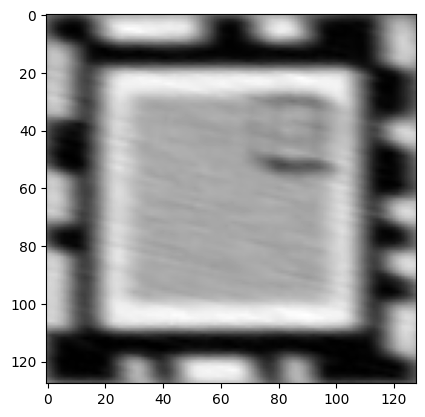

In [9]:
num = 14
marker, bit = valid_generator[num]
plt.imshow(marker[num], cmap="gray")
print(bit[num])

In [7]:
import tensorflow as tf

# Create a single 14x14 grid with values from 0 to 195
x = tf.reshape(tf.range(14 * 14), (1, 14, 14))
print("Input grid:")
print(x[0].numpy())


def extract_border(x):
    top_row = x[:, 0, :]          # shape: (1, 14)
    bottom_row = x[:, -1, :]      # shape: (1, 14)
    left_column = x[:, 1:-1, 0]   # shape: (1, 12)
    right_column = x[:, 1:-1, -1] # shape: (1, 12)

    outer_border = tf.concat([
        top_row,                   # 14 (left→right)
        right_column,              # 12 (top→bottom)
        bottom_row[:, ::-1],       # 14 (right→left)
        left_column[:, ::-1]       # 12 (bottom→top)
    ], axis=1)

    return outer_border

border = extract_border(x)
print("\nExtracted border shape:", border.shape)
print("Extracted border:")
print(border[0].numpy())


Input grid:
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13]
 [ 14  15  16  17  18  19  20  21  22  23  24  25  26  27]
 [ 28  29  30  31  32  33  34  35  36  37  38  39  40  41]
 [ 42  43  44  45  46  47  48  49  50  51  52  53  54  55]
 [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97]
 [ 98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125]
 [126 127 128 129 130 131 132 133 134 135 136 137 138 139]
 [140 141 142 143 144 145 146 147 148 149 150 151 152 153]
 [154 155 156 157 158 159 160 161 162 163 164 165 166 167]
 [168 169 170 171 172 173 174 175 176 177 178 179 180 181]
 [182 183 184 185 186 187 188 189 190 191 192 193 194 195]]

Extracted border shape: (1, 52)
Extracted border:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  27  41  55  69
  83  97 111 125 139 153 167 181 195 

In [6]:
run_name = 'decoder'

if not exists("../models/inpaint"):
    mkdir("../models/inpaint")

    
model_name = "simple_decoder"
csv_logger = CSVLogger(f"../models/inpaint/loss_{run_name}.csv")


model.fit(
    train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[stop, reduce_lr, csv_logger],
    verbose=True,
)
model.save(f"../models/inpaint/{run_name}.keras")

Epoch 1/100


/home/suyeonchoi/Infrared_apriltag_detection/marker/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 89s 24ms/step - loss: 0.2692 - val_loss: 0.2114 - learning_rate: 0.0010
Epoch 2/100
3334/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.2120

KeyboardInterrupt: 